# Análise de Vendas e Performance Comercial


## Introdução

Este notebook tem como objetivo realizar uma análise exploratória dos dados de vendas de uma empresa fictícia. Através dessa base, serão explorados indicadores como:

- Receita total;
- Custo total;
- Lucro gerado;
- Volume de vendas por produto e por categoria;
- Análise da performance comercial.

Com o objetivo de extrair insights valiosos sobre o comportamento das vendas, identificar os produtos mais relevantes, entender a distribuição de receita entre as categorias e apoiar a tomada de decisões estratégicas para o negócio.

A análise será realizada utilizando a linguagem Python, com o auxílio de bibliotecas como **Pandas** e **Matplotlib** para visualização de dados.

* Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

* Exploração Inicial

In [5]:
vendas_df = pd.read_csv('base_vendas.csv')
vendas_df.shape

(200, 9)

In [6]:
vendas_df.head()

,ID_Pedido,Data_Pedido,Categoria_Produto,Produto,Quantidade_Vendida,Preco_Unitario,Custo_Unitario,Regiao_Venda,Cliente
0,3f5e8b57-6cea-43ac-8af0-f8656c49f703,2024-07-15,Esportes,Bola de Futebol,1,3488.75,1867.16,Norte,Cauê Oliveira
1,224a2626-89d1-430b-8fed-85e49acf01c4,2024-08-31,Beleza,Maquiagem,10,2039.14,1431.22,Sul,Dra. Natália Correia
2,ac333461-9c91-4bfd-a88d-a4651aad450f,2024-09-17,Casa e Decoração,Sofá,1,3949.59,2227.25,Norte,Luiz Henrique da Mata
3,12bfd712-d849-462c-b5dd-ea0f3f9c0e92,2025-04-23,Beleza,Maquiagem,4,575.36,432.60,Nordeste,Amanda da Mota
4,d7ba66f3-8846-421a-8a48-de5ed8a827ff,2024-11-08,Casa e Decoração,Cadeira,8,237.39,142.92,Norte,Ana Julia Cardoso


* Verificar Valores Nulos

In [8]:
vendas_df.isnull().sum()

ID_Pedido             0
Data_Pedido           0
Categoria_Produto     0
Produto               0
Quantidade_Vendida    0
Preco_Unitario        0
Custo_Unitario        0
Regiao_Venda          0
Cliente               0
dtype: int64

 * Métricas Gerais

In [15]:
vendas_df['Receita'] = vendas_df['Quantidade_Vendida'] * vendas_df['Preco_Unitario']
receita = vendas_df['Receita'].sum()
receita

np.float64(2514102.9399999995)

In [14]:
vendas_df['Custo'] = vendas_df['Quantidade_Vendida'] * vendas_df['Custo_Unitario']
custo = vendas_df['Custo'].sum()
custo

np.float64(1608802.41)

In [16]:
vendas_df['Lucro'] = vendas_df['Receita'] - vendas_df['Custo']
lucro = vendas_df['Lucro'].sum()
lucro

np.float64(905300.53)

In [20]:
total_pedidos = vendas_df['ID_Pedido'].nunique()
total_pedidos

200

In [21]:
total_clientes_unicos = vendas_df['Cliente'].nunique()
total_clientes_unicos

200

In [29]:
total_vendas = vendas_df['Quantidade_Vendida'].sum()
total_vendas

np.int64(1022)

In [27]:
vendas_por_regiao = vendas_df.groupby('Regiao_Venda')['Quantidade_Vendida'].sum().reset_index().sort_values(by='Quantidade_Vendida', ascending=False)
vendas_por_regiao

,Regiao_Venda,Quantidade_Vendida
4,Sul,278
1,Nordeste,195
2,Norte,192
0,Centro-Oeste,180
3,Sudeste,177


In [31]:
vendas_por_categoria  = vendas_df.groupby('Categoria_Produto')['Quantidade_Vendida'].sum().reset_index()
vendas_por_categoria

,Categoria_Produto,Quantidade_Vendida
0,Beleza,260
1,Casa e Decoração,160
2,Eletrônicos,156
3,Esportes,238
4,Roupas,208


In [37]:
vendas_por_produto = vendas_df.groupby('Produto')['Quantidade_Vendida'].sum().reset_index().sort_values(by='Quantidade_Vendida', ascending=False)
vendas_por_produto.head(5)

,Produto,Quantidade_Vendida
14,Shampoo,90
9,Maquiagem,85
0,Bicicleta,77
1,Bola de Futebol,77
18,Tênis,74


## Vizualização de Dados

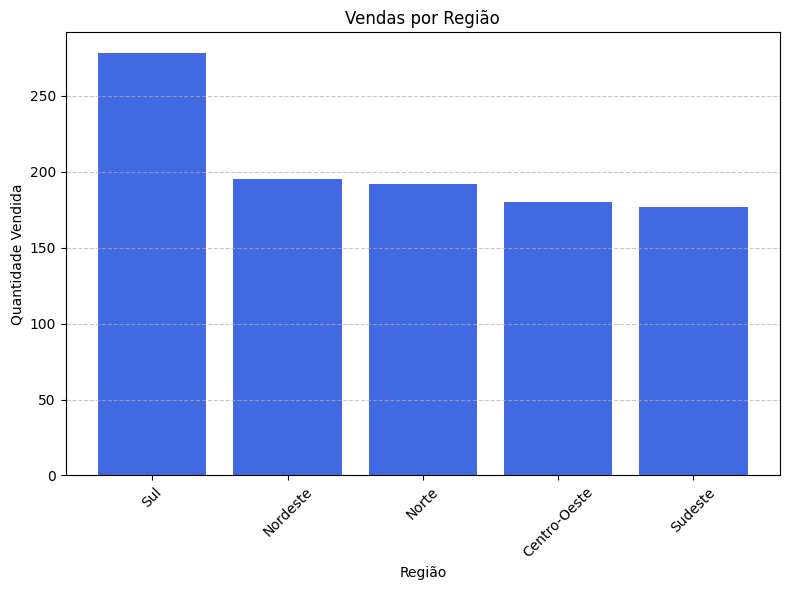

In [38]:
plt.figure(figsize=(8, 6))
plt.bar(vendas_por_regiao['Regiao_Venda'], vendas_por_regiao['Quantidade_Vendida'], color='royalblue')
plt.title('Vendas por Região')
plt.xlabel('Região')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


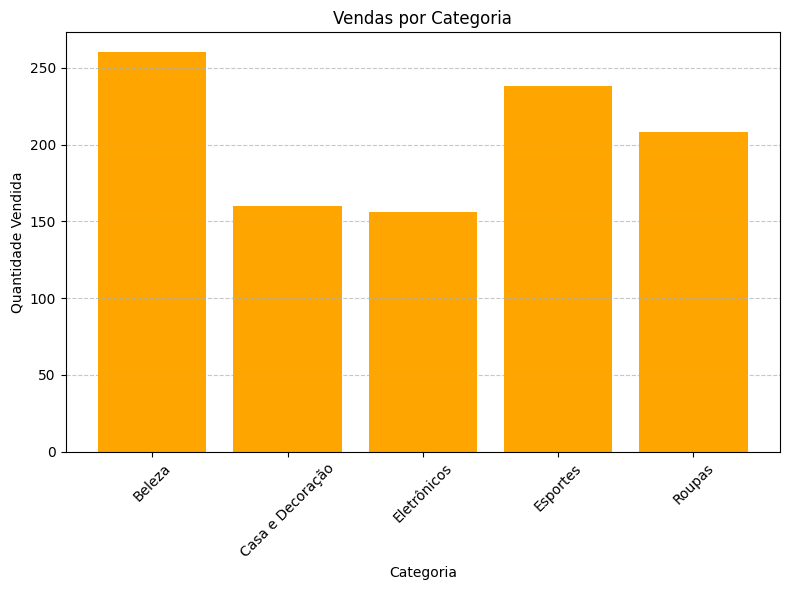

In [39]:
plt.figure(figsize=(8, 6))
plt.bar(vendas_por_categoria['Categoria_Produto'], vendas_por_categoria['Quantidade_Vendida'], color='orange')
plt.title('Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


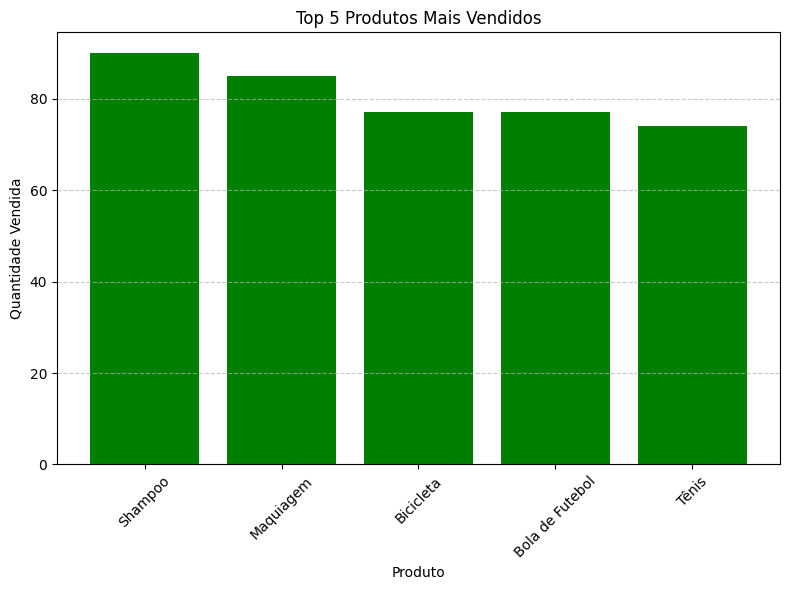

In [40]:
top5 = vendas_por_produto.head(5)

plt.figure(figsize=(8, 6))
plt.bar(top5['Produto'], top5['Quantidade_Vendida'], color='green')
plt.title('Top 5 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
